In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Circle
import seaborn as sns; 
from IPython.display import HTML

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import r2_score

In [3]:
#config parser
import configparser

sys.path.insert(0, '../Common/')
from AISDataManager import AISDataManager
import Constants as c
import HMUtils as hMUtil
import TimeUtils as timeUtils

#MyConfig.INI stores all the run time constants
config = configparser.ConfigParser()
config.read('../MyConfig.INI')

from joblib import Parallel, delayed
import multiprocessing
aISDM = AISDataManager()

In [4]:
lonMin = (float)(config['REGEION']['LON_MIN'])
lonMax = (float)(config['REGEION']['LON_MAX'])

latMin = (float)(config['REGEION']['LAT_MIN'])
latMax = (float)(config['REGEION']['LAT_MAX'])

print(lonMin,latMin)
print(lonMax,latMax)

increStep = (float)(config['HEATMAP']['INCR_STEP'])
incrRes = (int)(config['HEATMAP']['INCR_RES'])

-120.0 31.0
-117.0 34.5


In [5]:
xGrid = np.arange(lonMin,lonMax,increStep)
xGrid = np.around(xGrid,incrRes)
yGrid = np.arange(latMin,latMax,increStep)
yGrid = np.around(yGrid,incrRes)

In [6]:
heatMapDirectory = "../Data/AIS_0117_1217_31_M120_345_M117/HourlyHM/"

heatMapData = []
for i in range(0,8760):
    heatMapFile = heatMapDirectory + str(i) + '.npy'
    heatMapVal = np.load(heatMapFile)
    heatMapData.append(heatMapVal)

In [7]:
predHeatMapDirectory = "../Data/AIS_0117_1217_31_M120_345_M117/PredictedHM/"

predHeatMapData = []
for i in range(0,8757):
    heatMapFile = predHeatMapDirectory + str(i) + '.npy'
    heatMapVal = np.load(heatMapFile)
    predHeatMapData.append(heatMapVal)

In [8]:
diffHM = []
for i in range(8757):
    diffHM.append(heatMapData[i+3] - predHeatMapData[i])

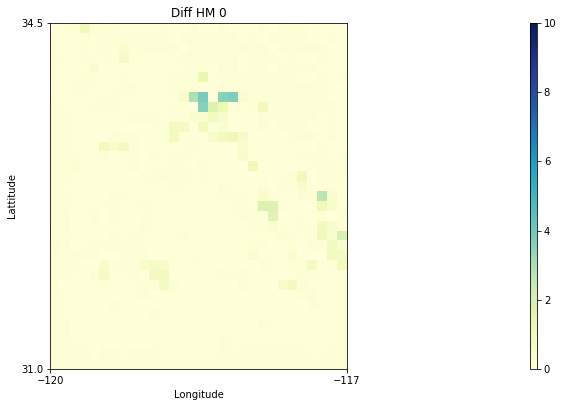

In [11]:
useAspect = 0
aspectRatio = 16.0/9.0
figWidth = 10
figHeight = 6

if useAspect == 1:
    figHeight = figWidth/aspectRatio

fig = plt.figure(figsize=(figWidth,figHeight))
ax1 = fig.add_axes([0.10, 0.11, 0.80, 0.80])
ax3 = fig.add_axes([0.96, 0.11, 0.01, 0.80])
# hourCounter = 0

def animate(hourCounter):
    diffImg = np.reshape(diffHM[hourCounter],(yGrid.shape[0],xGrid.shape[0]))
    diffImg = np.flip(diffImg,axis = 0)

    ax1.set_xticks([lonMin,lonMax])
    ax1.set_yticks([latMin,latMax])

    titleStr = "Diff HM " + str(hourCounter)
    ax1.set_title(titleStr)
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Lattitude')

    diffHandler = ax1.imshow(np.abs(diffImg), cmap=plt.get_cmap('YlGnBu'), extent=[lonMin,lonMax,latMin,latMax], vmax = 10)
    fig.colorbar(diffHandler,ax3)
    
anim = animation.FuncAnimation(fig, animate,frames=200, interval=500)

In [12]:
HTML(anim.to_html5_video())

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
anim.save('HMDiff.mp4', writer=writer)